importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

read the customer data as dataframe

In [2]:
df=pd.read_csv("Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

taking needed columns from dataset

In [5]:
ned_tr=['CustomerID', 'Gender', 'Age', 'Annual Income ($)','Spending Score (1-100)']

In [6]:
selected_tr=df[ned_tr]

In [7]:
selected_tr

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40
...,...,...,...,...,...
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4


In [30]:
selected_tr.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40


dATA PREPROCESSING

In [31]:
selected_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.2+ KB


In [32]:
selected_tr.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500
std,577.494589,28.429747,45739.536688,27.934661
min,1.000000,0.000000,0.000000,0.000000
25%,500.750000,25.000000,74572.000000,28.000000
50%,1000.500000,48.000000,110045.000000,50.000000
75%,1500.250000,73.000000,149092.750000,75.000000
max,2000.000000,99.000000,189974.000000,100.000000


In [33]:
selected_tr.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
dtype: object

In [34]:
null_values =selected_tr.isnull().sum()
print(null_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64


In [35]:
df = selected_tr.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,35000,81
2,Female,20,86000,6
3,Female,23,59000,77
4,Female,31,38000,40


In [36]:
df

,Gender,Age,Annual Income ($),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,35000,81
2,Female,20,86000,6
3,Female,23,59000,77
4,Female,31,38000,40
...,...,...,...,...
1995,Female,71,184387,40
1996,Female,91,73158,32
1997,Male,87,90961,14
1998,Male,77,182109,4


Data visualization

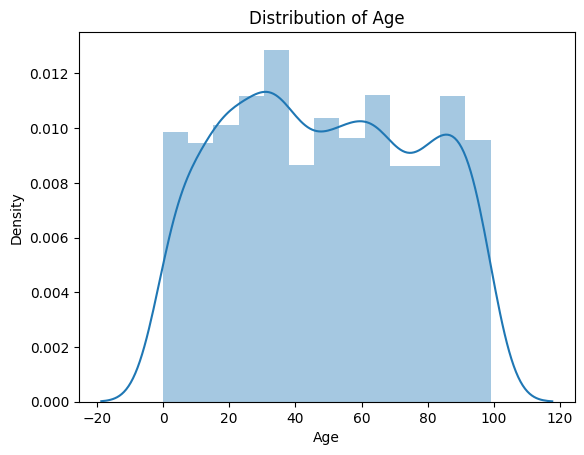

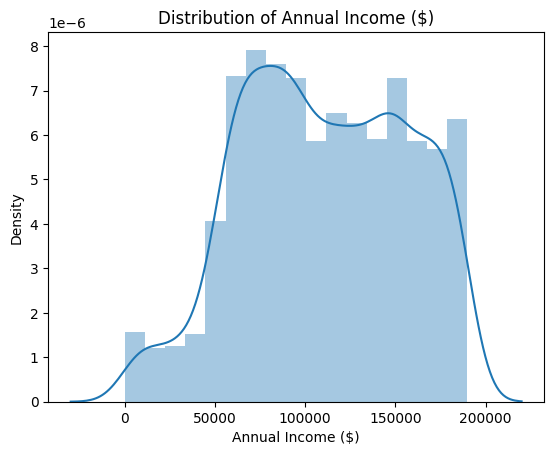

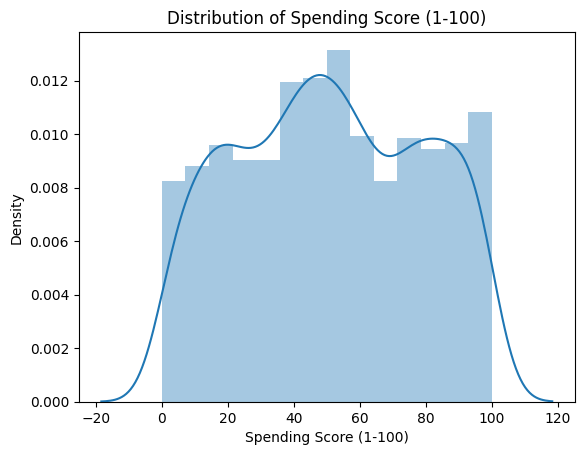

In [37]:
# Getting the Numerical Variables and Plotting the histograms
import warnings
warnings.filterwarnings('ignore')
columns = ['Age', 'Annual Income ($)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f"Distribution of {i}")

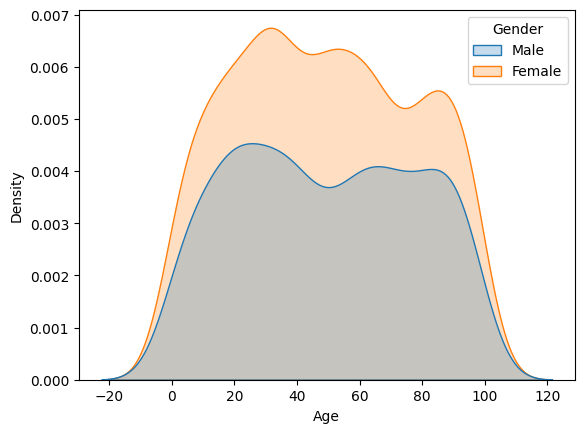

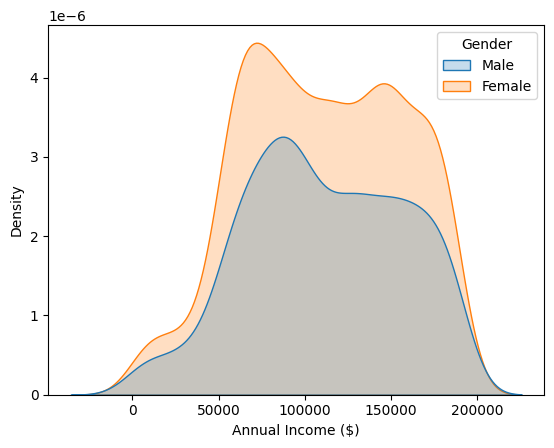

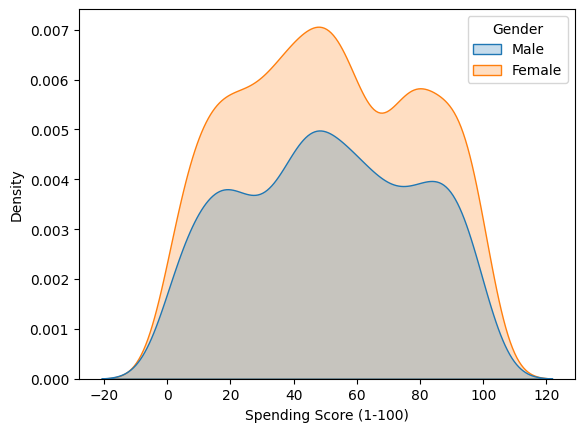

In [38]:
# KDE Plot with  Gender
for i in columns:
    plt.figure()
    sns.kdeplot(data = df, x = df[i],shade=True,hue = df['Gender']);

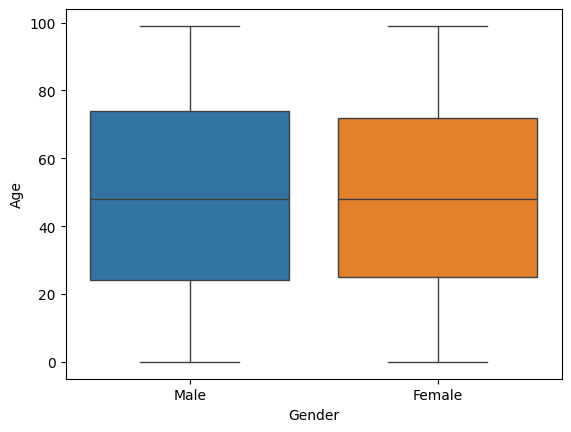

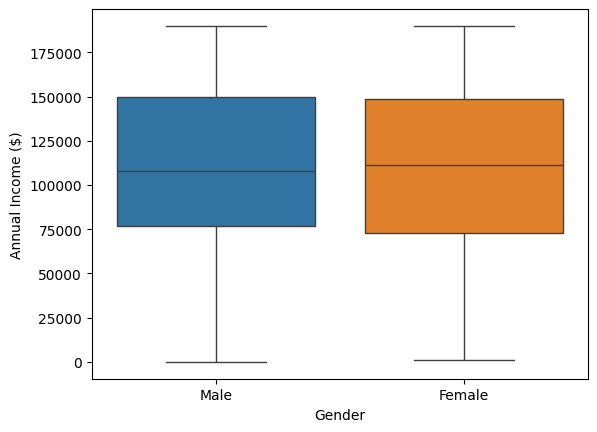

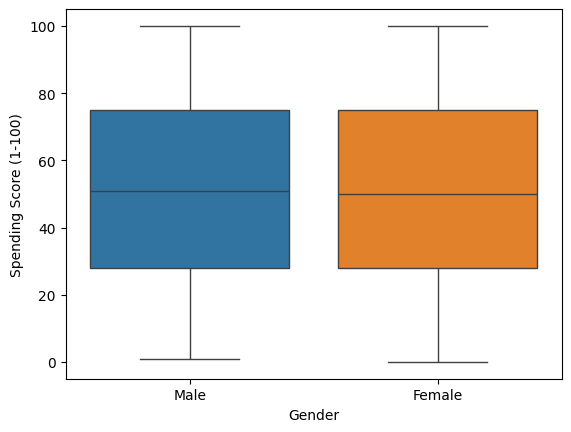

In [39]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i], hue = 'Gender')

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

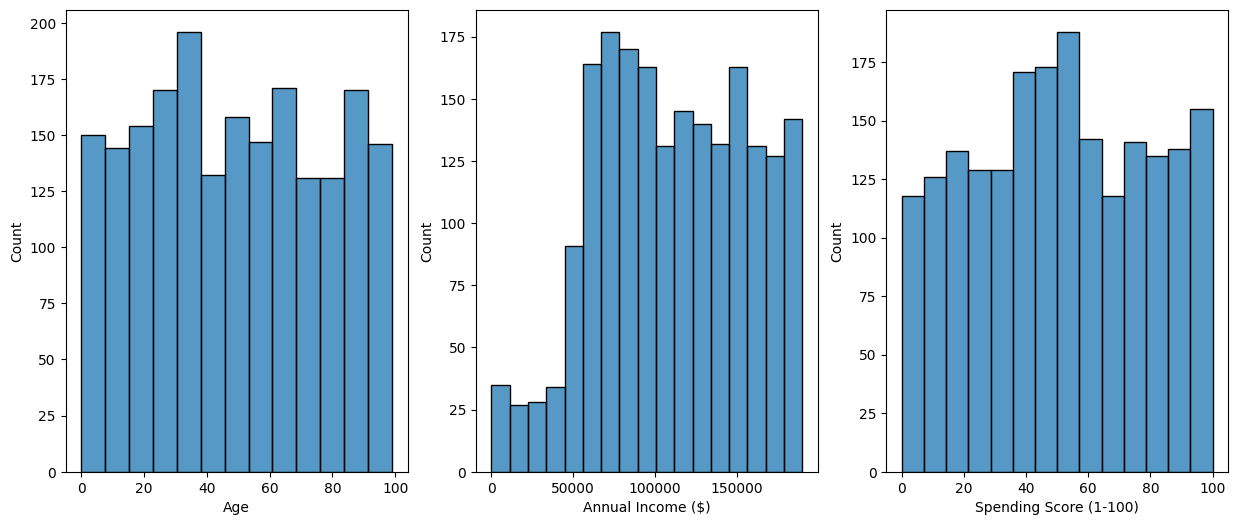

In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])
fig, axs = plt.subplots(1,3, figsize = (15,6))
plt1 = sns.histplot(df['Age'] , ax=axs[0])
plt2 = sns.histplot(df['Annual Income ($)'] , ax=axs[1])
plt3 = sns.histplot(df['Spending Score (1-100)'] , ax=axs[2])

plt.show();

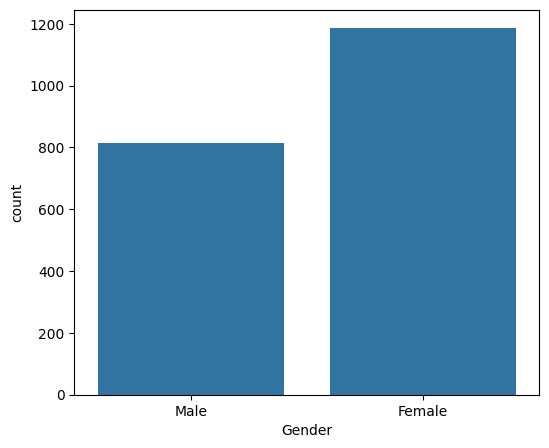

In [42]:
plt.figure(1 , figsize = (6 , 5))
sns.countplot(x = 'Gender' , data = df)
plt.show()

Outlier analysis

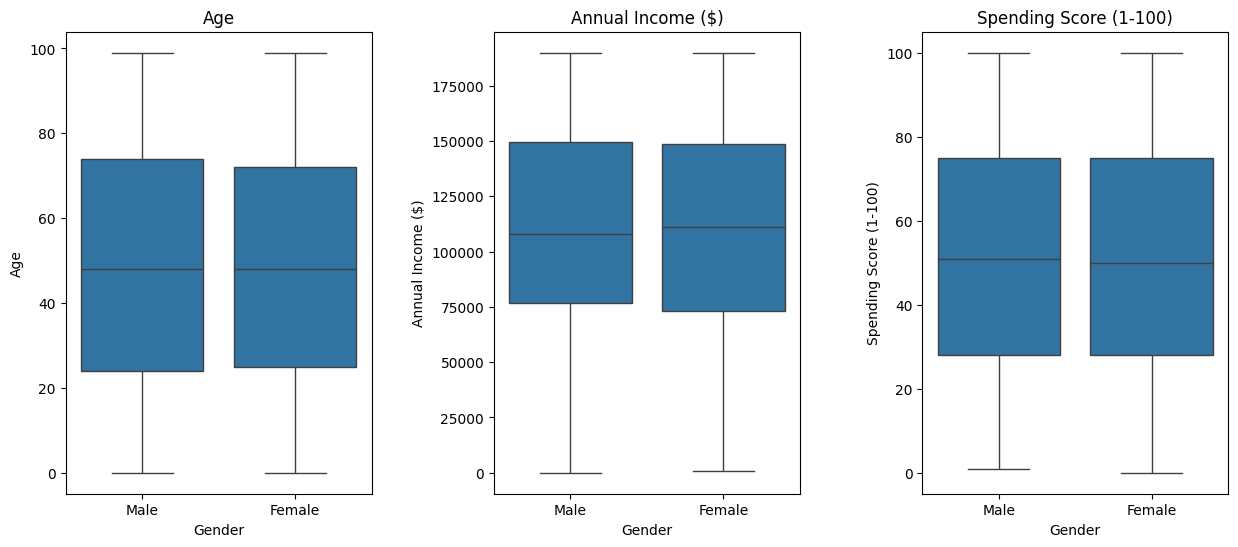

In [43]:
fig, axs = plt.subplots(1,3, figsize = (15,6))
axs = axs.flatten()
for i, ax in zip(columns, axs):
    sns.boxplot(x='Gender', y=i, data=df, ax=ax)
    ax.set_title(i)
plt.subplots_adjust(wspace=0.4)

In [44]:
df["Gender"].value_counts(normalize = True)

Female    0.593
Male      0.407
Name: Gender, dtype: float64

Bivariate Analysis

<Axes: xlabel='Annual Income ($)', ylabel='Spending Score (1-100)'>

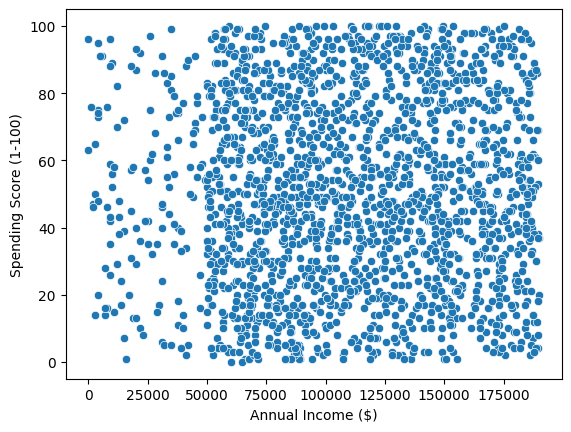

In [45]:
sns.scatterplot(data=df, x='Annual Income ($)',y='Spending Score (1-100)' )

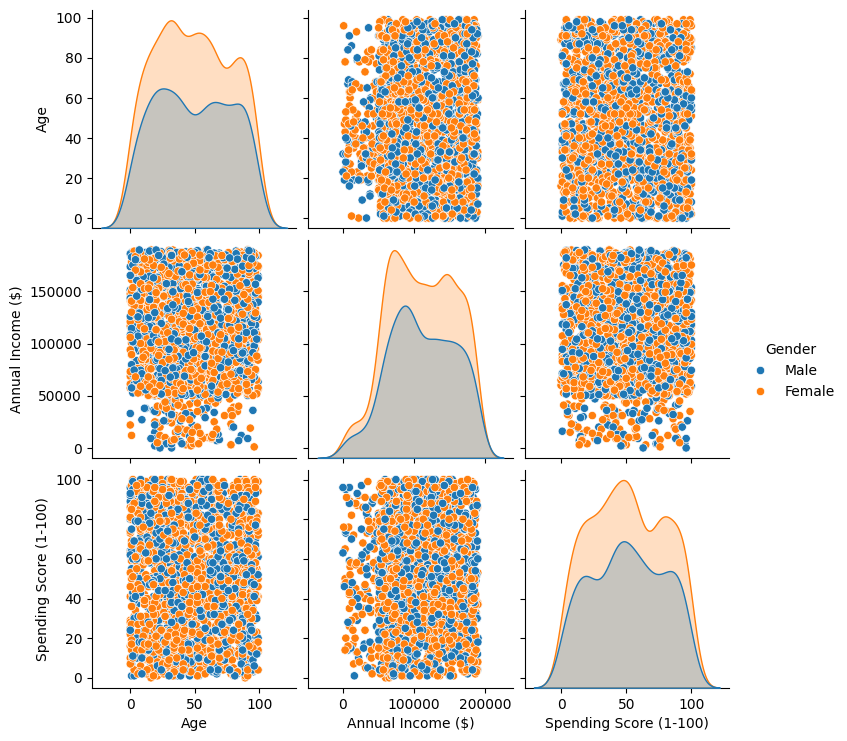

In [46]:
sns.pairplot(df, hue = "Gender")

<Axes: xlabel='Age', ylabel='Annual Income ($)'>

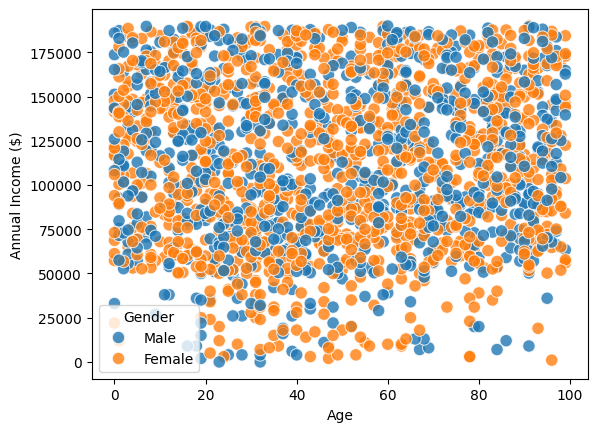

In [47]:
sns.scatterplot(data = df, x = "Age", y = "Annual Income ($)", s = 80 , alpha = 0.8, hue = "Gender")

<Axes: xlabel='Annual Income ($)', ylabel='Spending Score (1-100)'>

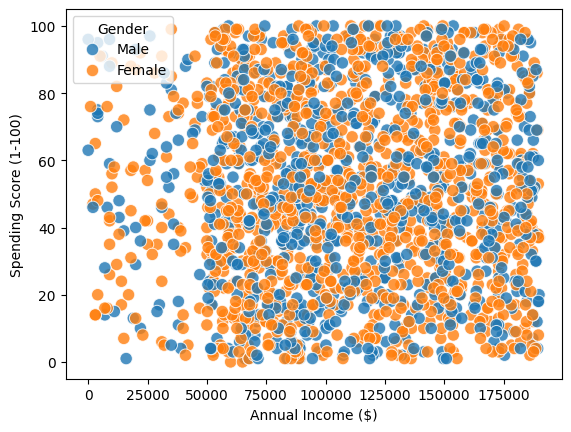

In [48]:
sns.scatterplot(data = df, x = "Annual Income ($)", y = "Spending Score (1-100)", s = 80 , alpha = 0.8, hue = "Gender")

In [49]:
df.groupby("Gender").mean()

,Age,Annual Income ($),Spending Score (1-100)
Gender,,,
Female,48.822934,110553.715008,50.974705
Male,49.159705,110991.323096,50.944717


<Axes: >

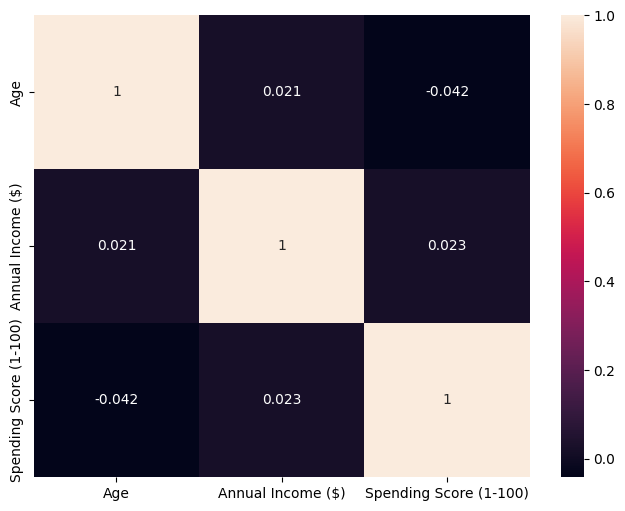

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns].corr(), annot = True)

clustering using k-means algorithm


In [51]:
## Applying Scaling and then Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income ($),Spending Score (1-100),Gender_Male
0,19,15000,39,1
1,21,35000,81,1
2,20,86000,6,0
3,23,59000,77,0
4,31,38000,40,0


In [54]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     2000 non-null   int64
 1   Annual Income ($)       2000 non-null   int64
 2   Spending Score (1-100)  2000 non-null   int64
 3   Gender_Male             2000 non-null   uint8
dtypes: int64(3), uint8(1)
memory usage: 49.0 KB


In [55]:
dff.columns

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

In [58]:
dff.describe

<bound method NDFrame.describe of       Age  Annual Income ($)  Spending Score (1-100)  Gender_Male
0      19              15000                      39            1
1      21              35000                      81            1
2      20              86000                       6            0
3      23              59000                      77            0
4      31              38000                      40            0
...   ...                ...                     ...          ...
1995   71             184387                      40            0
1996   91              73158                      32            0
1997   87              90961                      14            1
1998   77             182109                       4            1
1999   90             110610                      52            1

[2000 rows x 4 columns]>

In [53]:
X = df.iloc[:, [2,3]].values

The elbow method

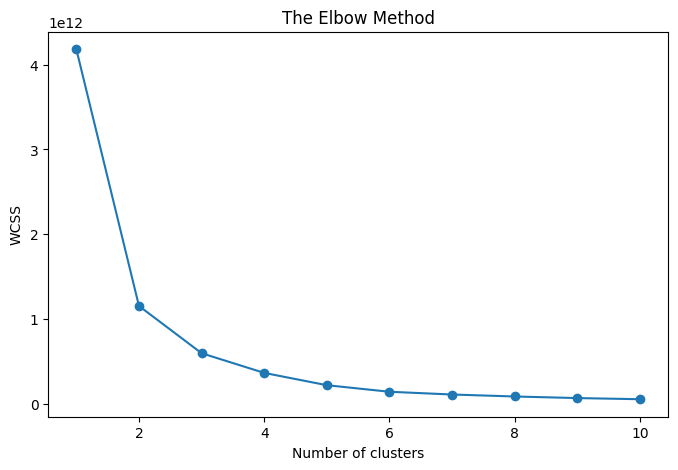

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
df1 = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
df1.head()

,Age,Annual Income ($),Spending Score (1-100),Gender_Male
0,-1.054089,-2.093501,-0.428339,1.207064
1,-0.983723,-1.656133,1.075546,1.207064
2,-1.018906,-0.540845,-1.609962,-0.828457
3,-0.913356,-1.131292,0.932319,-0.828457
4,-0.631891,-1.590528,-0.392532,-0.828457


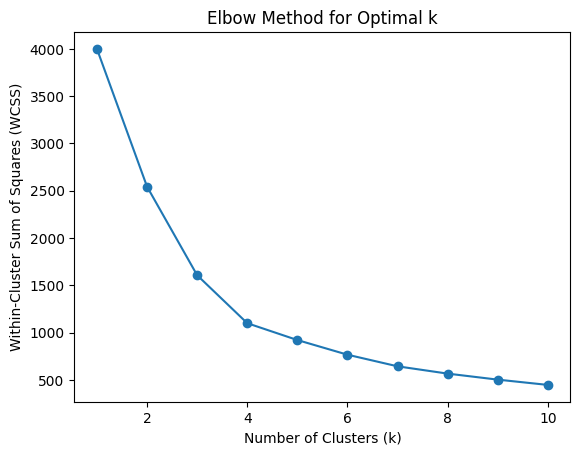

In [62]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[['Annual Income ($)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

In [64]:
print(X.shape)
print(y_kmeans.shape)

(2000, 2)
(2000,)


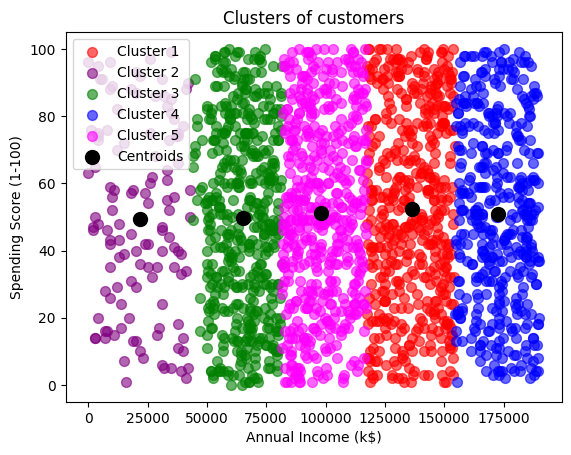

In [69]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', alpha=0.6, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'purple', alpha=0.6, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', alpha=0.6, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'blue', alpha=0.6, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', alpha=0.6, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')          
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()